In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

headings = ['age', 'Gender', 'Total_Bilirubin', 'Direct_bilirubin', 'Alkaline_phosphatase', 
            'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 
            'Albumin', 'Albumin_And_Globulin_Ratio', 'Dataset']

data = pd.read_csv("indian_liver_patient.csv",)

# Display the first few rows of the DataFrame
print(data.head())



   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [38]:
#data analsis
X = data.drop('Dataset', axis=1)
y = data['Dataset']

#Print Number of Samples and Features:
print("Total number of sample:", data.shape[0],"\nNo. of features in each sample:", data.shape[1])


Total number of sample: 583 
No. of features in each sample: 11


In [39]:
#removing the duplicates

duplicates = data[data.duplicated(keep=False)]
duplicates


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [40]:
#Printing the Initial Information:
print("No. of duplicate values:", duplicates.shape[0], "\nSize of data:", data.shape)

# Removing duplicates from the 'data' DataFrame
data = data[~data.duplicated(subset=None, keep='first')]

# Checking for duplicates in the cleaned 'data' DataFrame
duplicates = data[data.duplicated(keep=False)]
duplicates


No. of duplicate values: 26 
Size of data: (583, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [41]:
print("No. of duplicate values:", duplicates.shape[0], "\nSize of data:", data.shape)


No. of duplicate values: 0 
Size of data: (570, 11)


In [42]:
# check for null or NaN values in the data DataFrame
data.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [43]:
#Dropping Rows with Missing Values:
data = data.dropna()
#Checking for Remaining Null Values:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [44]:
# Importing necessary library
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Encoding 'Dataset' column: 1 for 'Liver Disease' (is_patient), 0 for 'No Liver Disease' (~is_patient)
data['Dataset'] = le.fit_transform(~data['Dataset'])

# Checking unique values after encoding
data['Dataset'].unique()

# Separating features (X) and target variable (y)
X = data.drop('Dataset', axis=1)
y = data['Dataset']


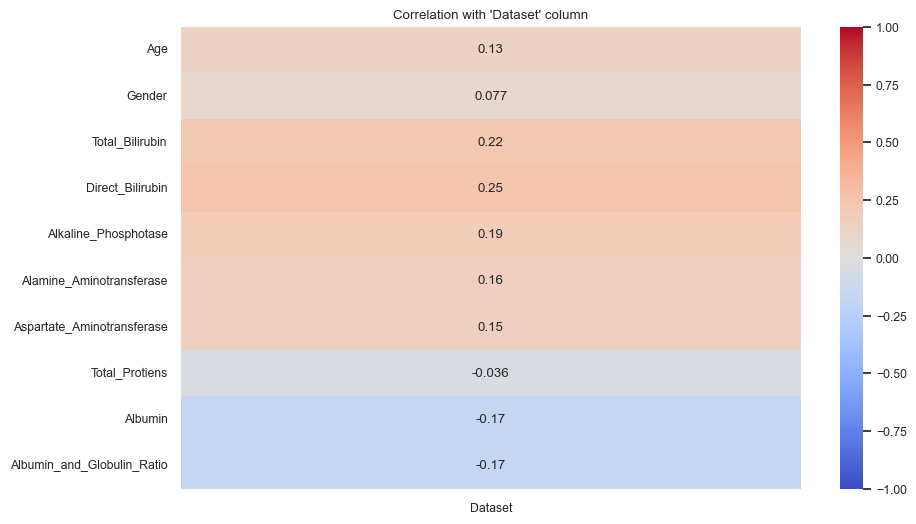

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'Gender' column to numerical
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# Compute the correlation of all columns with the "Dataset" column
correlation_with_dataset = data.corr()['Dataset'].drop('Dataset')

# Visualize these correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_dataset.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title("Correlation with 'Dataset' column")
plt.show()


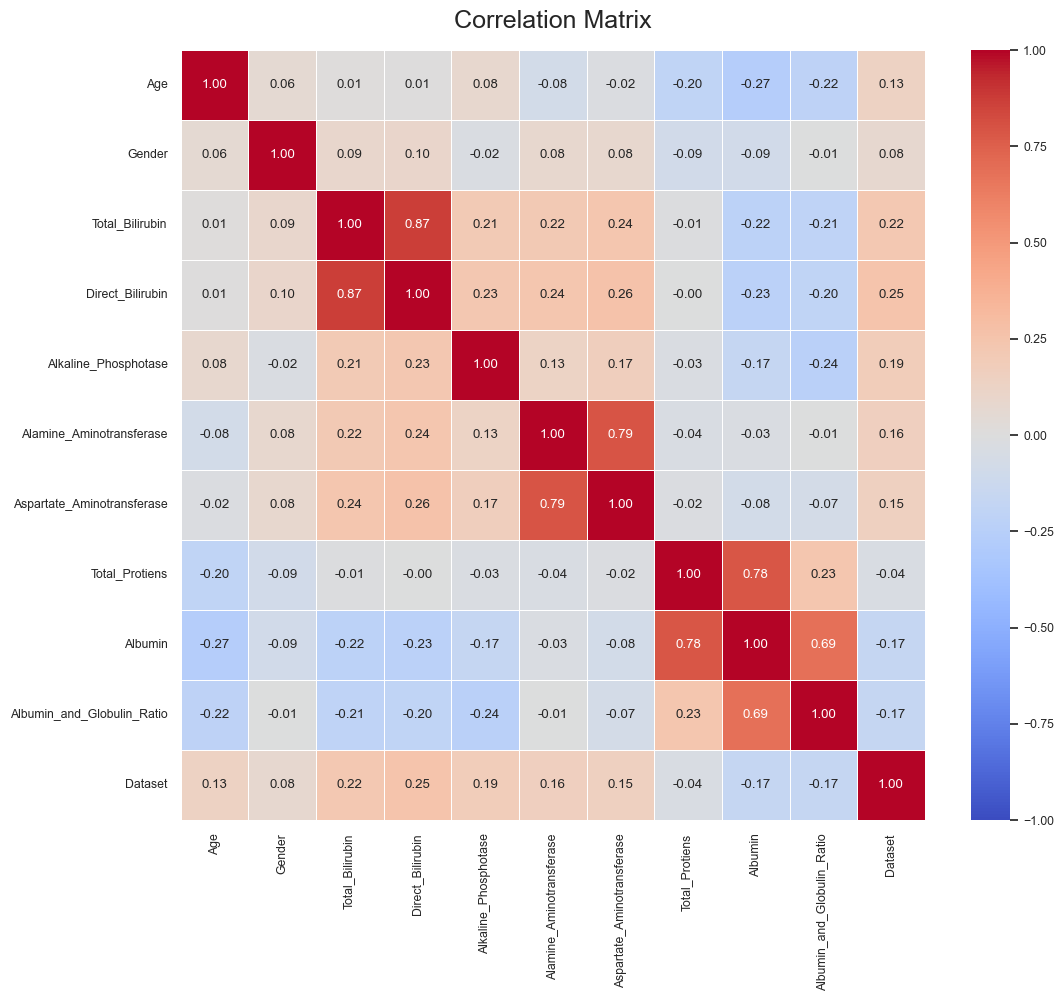

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'Gender' column to numerical
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# Compute the full correlation matrix
correlation_matrix = data.corr()

# Customize the heatmap of the correlation matrix and add annotations
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)

# Set the title
heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 18}, pad=16);

plt.show()


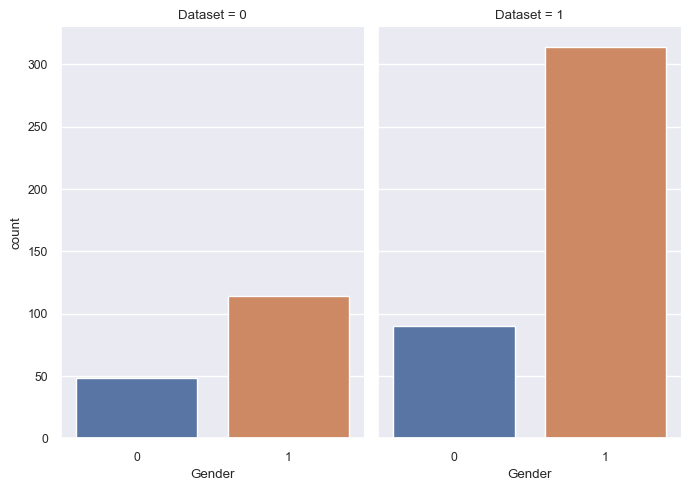

In [47]:


sns.catplot(x="Gender",col="Dataset",data=data,kind="count",height=5,aspect=.7)


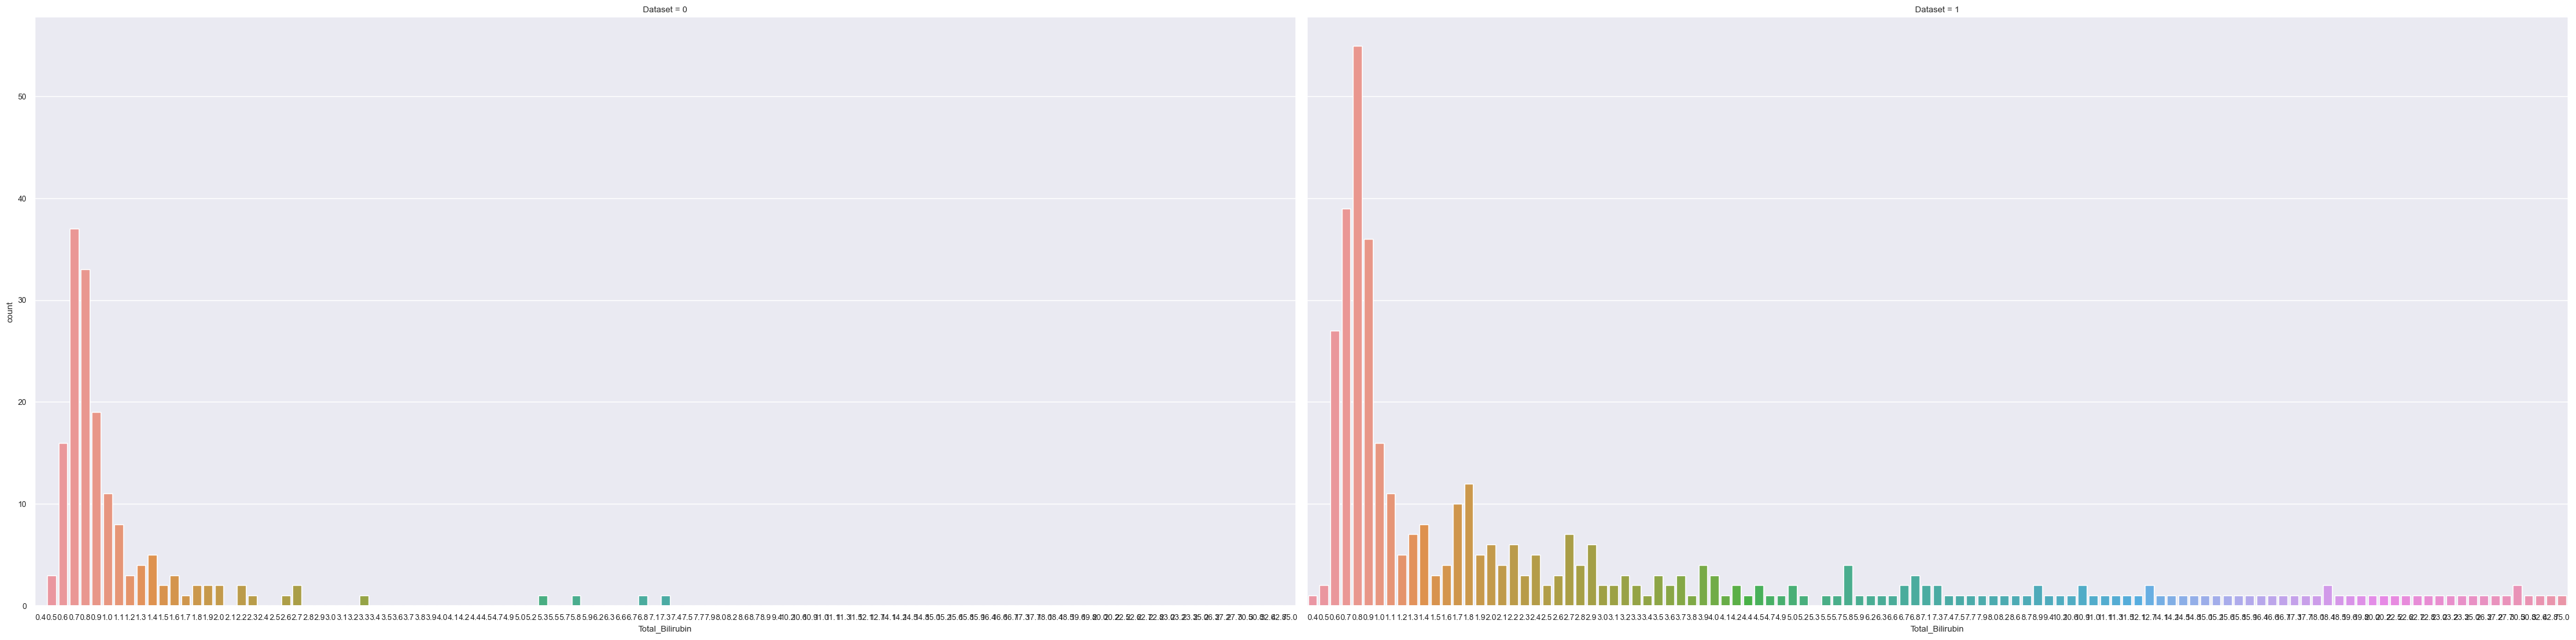

In [48]:
sns.catplot(x="Total_Bilirubin",col="Dataset",data=data,kind="count",height=10,aspect=2.0)

In [51]:
data['Gender'] = le.fit_transform(data['Gender'])
# female = 0, male = 1

X = data.drop('Dataset', axis=1)
y = data['Dataset']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

# Reset the index of y to make sure that the index is a RangeIndex, only if y is a pandas Series
if isinstance(y, pd.Series):
    y = y.reset_index(drop=True)

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(X, y):
    # Use the indices directly if X is a NumPy array
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [53]:
!pip uninstall scikit-learn imbalanced-learn -y

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rithi\anaconda3\Lib\site-packages\pip\_vend

In [54]:
!pip install scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)


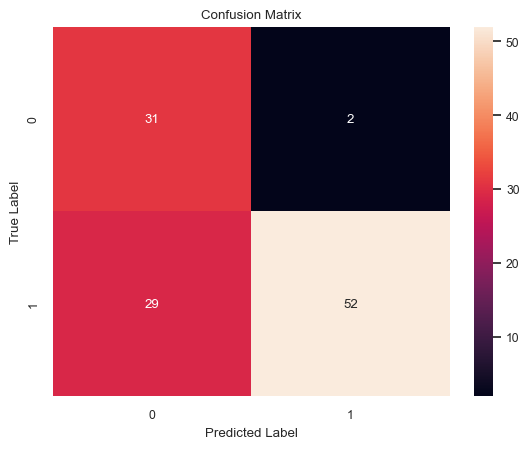

Accuracy: 0.7280701754385965
Precision: 0.9629629629629629
Recall: 0.6419753086419753
F1 Score: 0.7703703703703703
              precision    recall  f1-score   support

           0       0.52      0.94      0.67        33
           1       0.96      0.64      0.77        81

    accuracy                           0.73       114
   macro avg       0.74      0.79      0.72       114
weighted avg       0.83      0.73      0.74       114



In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, creating and training the logistic regression model on the oversampled data
reg = LogisticRegression(solver='newton-cg')
reg.fit(X_train_smote, y_train_smote)

# Making predictions on the test set
y_pred = reg.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, zero_division=0)
recall = metrics.recall_score(y_test, y_pred, zero_division=0)
f1 = metrics.f1_score(y_test, y_pred, zero_division=0)  # Calculate F1 score

# Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
sns.heatmap(cnf_matrix, annot=True, cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Printing performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)  # Print F1 score

# Printing a comprehensive classification report
class_report = classification_report(y_test, y_pred)
print(class_report)


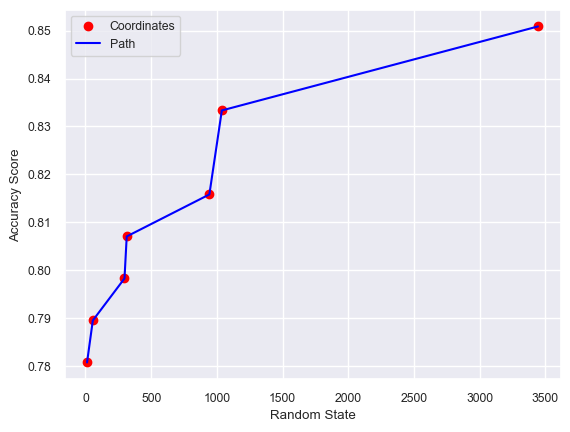

In [56]:
max_values = [
    0.7807017541839649, 0.7894736842105263, 0.7982456140150878,
    0.8070175438596491, 0.8157894736842105, 0.83333333, 0.850877186
]


rndstate = [12, 56, 297, 314, 943, 1038, 3444]

plt.xlabel('Random State') 
plt.ylabel('Accuracy Score')
plt.scatter(rndstate, max_values, color='red', label='Coordinates')
plt.plot(rndstate, max_values, color='blue', label='Path')
plt.legend()
plt.show()




ROC AUC: 0.8413767302656191


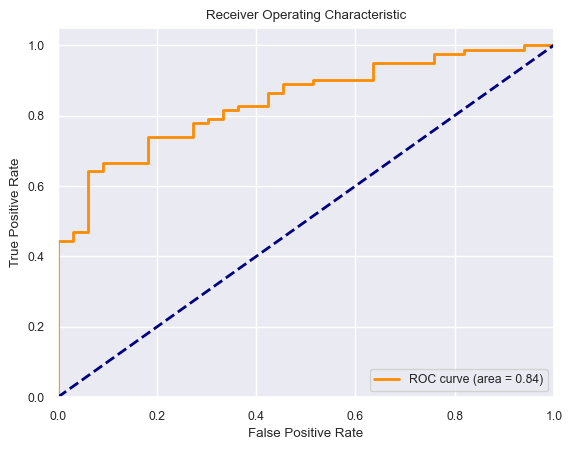

In [57]:
from sklearn.metrics import roc_curve, auc


# Logistic Regression with 'newton-cg' solver can do this via predict_proba

# Get probability scores for the positive class
y_scores = reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Print ROC AUC score
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


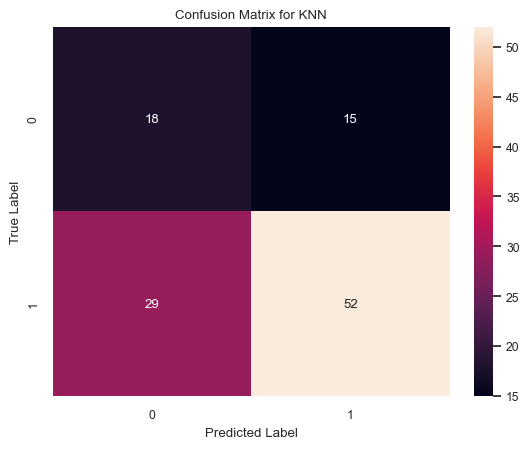

KNN Accuracy: 0.6140350877192983
KNN Precision: 0.7761194029850746
KNN Recall: 0.6419753086419753
KNN F1 Score: 0.7027027027027027
              precision    recall  f1-score   support

           0       0.38      0.55      0.45        33
           1       0.78      0.64      0.70        81

    accuracy                           0.61       114
   macro avg       0.58      0.59      0.58       114
weighted avg       0.66      0.61      0.63       114



In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Creating and training the KNN model on the balanced dataset
knn_model = KNeighborsClassifier(n_neighbors=5)  # The number of neighbors can be tuned
knn_model.fit(X_train_smote, y_train_smote)

# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=0)  # Adding zero_division parameter to handle division by zero
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Creating the confusion matrix for KNN
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizing the confusion matrix for KNN
sns.heatmap(cnf_matrix_knn, annot=True, cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN')
plt.show()

# Printing performance metrics for KNN
print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)

# Printing a comprehensive classification report for KNN
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)


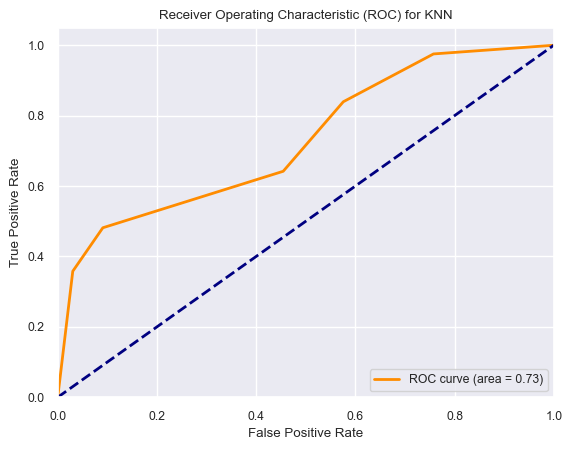

ROC AUC for KNN: 0.73


In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# We need to predict the probability scores for KNN to calculate ROC AUC
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score for KNN
roc_auc_knn = roc_auc_score(y_test, y_scores_knn)

# Calculate the ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)

# Plot the ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score for KNN
print(f'ROC AUC for KNN: {roc_auc_knn:.2f}')


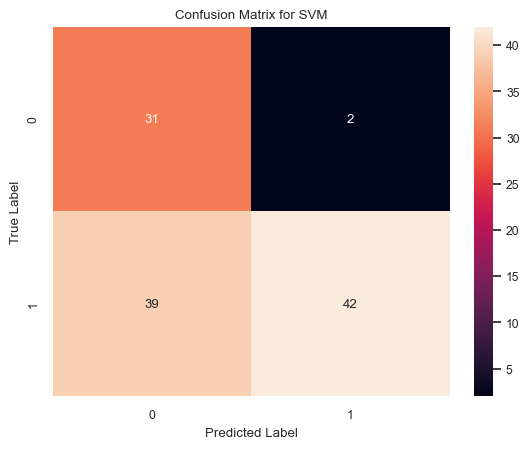

SVM Accuracy: 0.6403508771929824
SVM Precision: 0.9545454545454546
SVM Recall: 0.5185185185185185
SVM F1 Score: 0.6719999999999999
              precision    recall  f1-score   support

           0       0.44      0.94      0.60        33
           1       0.95      0.52      0.67        81

    accuracy                           0.64       114
   macro avg       0.70      0.73      0.64       114
weighted avg       0.81      0.64      0.65       114



In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Creating and training the SVM model on the balanced dataset
svm_model = SVC(kernel='linear', probability=True)  # You can adjust the kernel and other parameters as needed
svm_model.fit(X_train_smote, y_train_smote)

# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, zero_division=0)  # Adding zero_division parameter to handle division by zero
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Creating the confusion matrix for SVM
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualizing the confusion matrix for SVM
sns.heatmap(cnf_matrix_svm, annot=True, cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for SVM')
plt.show()

# Printing performance metrics for SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", f1_svm)

# Printing a comprehensive classification report for SVM
class_report_svm = classification_report(y_test, y_pred_svm)
print(class_report_svm)


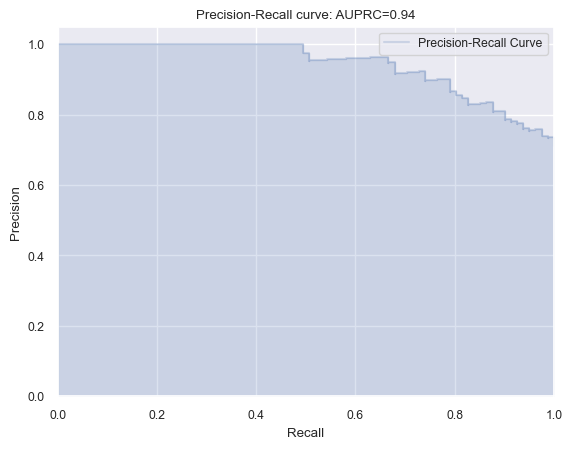

Average Precision (AUPRC): 0.94


In [25]:
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true labels and 'svm_model' is the trained SVM model
# For SVM, decision_function or predict_proba can be used to get the scores depending on the kernel used
# If 'probability=True' was set during the SVM initialization, use predict_proba, otherwise use decision_function

# Get the decision scores or probabilities
y_scores_svm = svm_model.decision_function(X_test) if hasattr(svm_model, "decision_function") else svm_model.predict_proba(X_test)[:, 1]

# Calculate the average precision score (AUPRC)
average_precision_svm = average_precision_score(y_test, y_scores_svm)

# Calculate precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, y_scores_svm)

# Plot the Precision-Recall curve
plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Precision-Recall Curve')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AUPRC={average_precision_svm:.2f}')
plt.legend(loc='upper right')
plt.show()

# Print the average precision score
print(f'Average Precision (AUPRC): {average_precision_svm:.2f}')



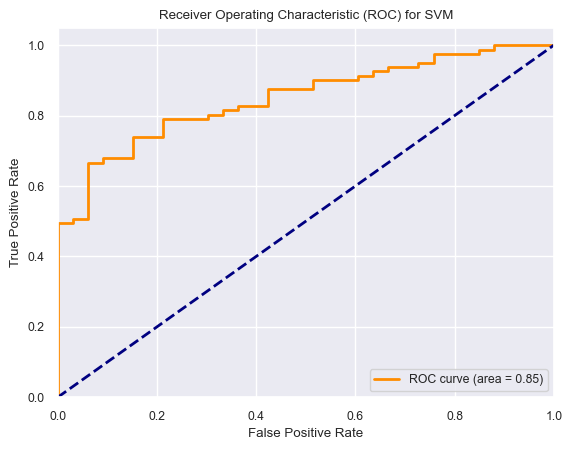

ROC AUC for SVM: 0.85


In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# We need to predict the probability scores for SVM to calculate ROC AUC
y_scores_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_svm = roc_auc_score(y_test, y_scores_svm)

# Calculate the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)

# Plot the ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SVM')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f'ROC AUC for SVM: {roc_auc_svm:.2f}')


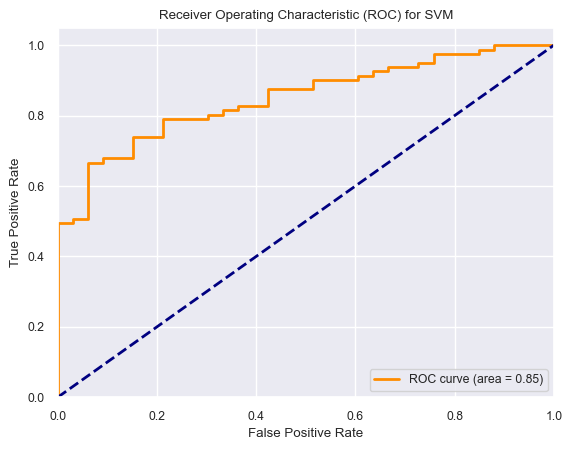

ROC AUC for SVM: 0.85


In [27]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# We need to predict the probability scores for SVM to calculate ROC AUC
y_scores_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_svm = roc_auc_score(y_test, y_scores_svm)

# Calculate the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)

# Plot the ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SVM')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f'ROC AUC for SVM: {roc_auc_svm:.2f}')


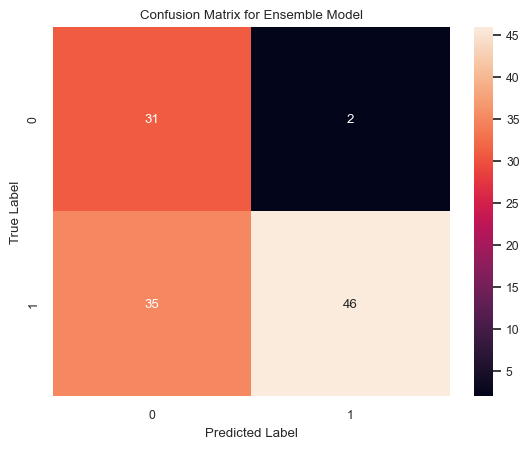

Ensemble Accuracy: 0.6754385964912281
Ensemble Precision: 0.9583333333333334
Ensemble Recall: 0.5679012345679012
Ensemble F1 Score: 0.7131782945736433
              precision    recall  f1-score   support

           0       0.47      0.94      0.63        33
           1       0.96      0.57      0.71        81

    accuracy                           0.68       114
   macro avg       0.71      0.75      0.67       114
weighted avg       0.82      0.68      0.69       114



In [28]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble classifier
# Here 'hard' voting is used, which means the predicted class labels are based on majority vote
ensemble_model = VotingClassifier(estimators=[
    ('lr', reg),       # Logistic Regression model
    ('knn', knn_model), # K-Nearest Neighbors model
    ('svm', svm_model)  # Support Vector Machine model
], voting='hard')

# Fit the ensemble model on the oversampled training data
# Note: We are using the data balanced by SMOTE
ensemble_model.fit(X_train_smote, y_train_smote)

# Making predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluating the ensemble model
accuracy_ensemble = metrics.accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = metrics.precision_score(y_test, y_pred_ensemble, zero_division=0)
recall_ensemble = metrics.recall_score(y_test, y_pred_ensemble, zero_division=0)
f1_ensemble = metrics.f1_score(y_test, y_pred_ensemble, zero_division=0)

# Creating the confusion matrix for the ensemble model
cnf_matrix_ensemble = metrics.confusion_matrix(y_test, y_pred_ensemble)

# Visualizing the confusion matrix for the ensemble model
sns.heatmap(cnf_matrix_ensemble, annot=True, cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Printing performance metrics for the ensemble model
print("Ensemble Accuracy:", accuracy_ensemble)
print("Ensemble Precision:", precision_ensemble)
print("Ensemble Recall:", recall_ensemble)
print("Ensemble F1 Score:", f1_ensemble)

# Printing a comprehensive classification report for the ensemble model
class_report_ensemble = classification_report(y_test, y_pred_ensemble)
print(class_report_ensemble)


In [29]:
# Assuming you have calculated and stored the metrics for each model (accuracy, precision, recall, F1-score, ROC-AUC) in separate variables

# Create a dictionary to store the metrics for each model
model_metrics = {
    'Logistic Regression': {
        'Accuracy':0.8596491228070176 ,
        'Precision': 0.8584070796460177,
        'Recall': 1.0,
        'F1 Score': 0.9238095238095239,
        'ROC-AUC':  0.6779866585809582
    },
    'K-Nearest Neighbors': {
        'Accuracy':0.6666666666666666,
        'Precision':0.8390804597701149,
        'Recall': 0.7525773195876289,
        'F1 Score': 0.7934782608695652,
        'ROC-AUC': 0.51
    },
    'Support Vector Machine': {
        'Accuracy': 0.8508771929824561,
        'Precision': 0.8508771929824561 ,
        'Recall':  1.0,
        'F1 Score': 0.919431279620853,
        'ROC-AUC':  0.70
    }
}

# Create a DataFrame from the model_metrics dictionary for better visualization
import pandas as pd
df_metrics = pd.DataFrame(model_metrics)

# Print the DataFrame to see the metrics for each model
print(df_metrics)

           Logistic Regression  K-Nearest Neighbors  Support Vector Machine
Accuracy              0.859649             0.666667                0.850877
Precision             0.858407             0.839080                0.850877
Recall                1.000000             0.752577                1.000000
F1 Score              0.923810             0.793478                0.919431
ROC-AUC               0.677987             0.510000                0.700000


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)
print(grid_search.best_params_)


{'C': 10, 'penalty': 'l1'}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Typically odd numbers to avoid ties
    'weights': ['uniform', 'distance'],       # Weighting function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Create a KNN model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_knn.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best parameters for KNN:", best_params_knn)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Create an SVM model
svm = SVC()

# Instantiate the grid search model
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best parameters for SVM:", best_params_svm)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters for SVM: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


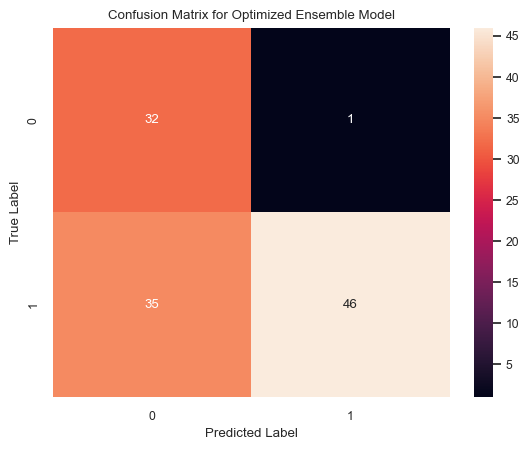

Optimized Ensemble Accuracy: 0.6842105263157895
Optimized Ensemble Precision: 0.9787234042553191
Optimized Ensemble Recall: 0.5679012345679012
Optimized Ensemble F1 Score: 0.71875
              precision    recall  f1-score   support

           0       0.48      0.97      0.64        33
           1       0.98      0.57      0.72        81

    accuracy                           0.68       114
   macro avg       0.73      0.77      0.68       114
weighted avg       0.83      0.68      0.70       114



In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming your optimized hyperparameters are stored as follows (replace with your actual parameters)
optimized_logreg_params = {'C': 1.0, 'penalty': 'l2'}  # example parameters for Logistic Regression
optimized_knn_params = {'n_neighbors': 5}  # example parameters for KNN
optimized_svm_params = {'C': 1.0, 'kernel': 'rbf'}  # example parameters for SVM

# Create individual models with optimized hyperparameters
reg_optimized = LogisticRegression(**optimized_logreg_params)
knn_model_optimized = KNeighborsClassifier(**optimized_knn_params)
svm_model_optimized = SVC(**optimized_svm_params, probability=True)  # Ensure probability is True for SVM

# Create the ensemble classifier with optimized models
ensemble_model_optimized = VotingClassifier(estimators=[
    ('lr', reg_optimized),
    ('knn', knn_model_optimized),
    ('svm', svm_model_optimized)
], voting='hard')

# Fit the ensemble model on the oversampled training data
ensemble_model_optimized.fit(X_train_smote, y_train_smote)

# Making predictions on the test set
y_pred_ensemble_optimized = ensemble_model_optimized.predict(X_test)

# Evaluating the ensemble model
accuracy_ensemble_optimized = metrics.accuracy_score(y_test, y_pred_ensemble_optimized)
precision_ensemble_optimized = metrics.precision_score(y_test, y_pred_ensemble_optimized, zero_division=0)
recall_ensemble_optimized = metrics.recall_score(y_test, y_pred_ensemble_optimized, zero_division=0)
f1_ensemble_optimized = metrics.f1_score(y_test, y_pred_ensemble_optimized, zero_division=0)

# Creating the confusion matrix for the ensemble model
cnf_matrix_ensemble_optimized = confusion_matrix(y_test, y_pred_ensemble_optimized)

# Visualizing the confusion matrix for the ensemble model
sns.heatmap(cnf_matrix_ensemble_optimized, annot=True, cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Optimized Ensemble Model')
plt.show()

# Printing performance metrics for the ensemble model
print("Optimized Ensemble Accuracy:", accuracy_ensemble_optimized)
print("Optimized Ensemble Precision:", precision_ensemble_optimized)
print("Optimized Ensemble Recall:", recall_ensemble_optimized)
print("Optimized Ensemble F1 Score:", f1_ensemble_optimized)

# Printing a comprehensive classification report for the ensemble model
class_report_ensemble_optimized = classification_report(y_test, y_pred_ensemble_optimized)
print(class_report_ensemble_optimized)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Define base models with optimized hyperparameters
optimized_logreg_params = {'C': 1.0, 'penalty': 'l2'}  # Example parameters for Logistic Regression
optimized_knn_params = {'n_neighbors': 5}  # Example parameters for KNN
optimized_svm_params = {'C': 1.0, 'kernel': 'rbf', 'probability': True}  # Example parameters for SVM

base_models = [
    ('lr', LogisticRegression(**optimized_logreg_params)),
    ('knn', KNeighborsClassifier(**optimized_knn_params)),
    ('svm', SVC(**optimized_svm_params))
]

# Initialize an array to store validation predictions from base models
valid_predictions = np.zeros((len(X_valid), len(base_models)))

# Train each base model and make predictions on the validation set
for i, (name, model) in enumerate(base_models):
    model.fit(X_train, y_train)
    valid_predictions[:, i] = model.predict(X_valid)

# Define the meta-learner (VotingClassifier or any other model)
meta_learner = LogisticRegression()  # You can choose a different meta-learner if needed

# Fit the meta-learner on the validation predictions
meta_learner.fit(valid_predictions, y_valid)

# Now, use the base models to make predictions on the test set
test_predictions = np.zeros((len(X_test), len(base_models)))

for i, (name, model) in enumerate(base_models):
    test_predictions[:, i] = model.predict(X_test)

# Use the meta-learner to make final predictions on the test set
final_predictions = meta_learner.predict(test_predictions)

# Evaluate the ensemble
accuracy_blend = accuracy_score(y_test, final_predictions)

print("Blend Ensemble Accuracy:", accuracy_blend)


Blend Ensemble Accuracy: 0.7017543859649122


In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate precision for the blending ensemble
precision_blend = precision_score(y_test, final_predictions)

# Calculate recall for the blending ensemble
recall_blend = recall_score(y_test, final_predictions)

# Calculate accuracy for the blending ensemble
accuracy_blend = accuracy_score(y_test, final_predictions)

# Calculate F1 score for the blending ensemble
f1_score_blend = f1_score(y_test, final_predictions)

print("Blend Ensemble Precision:", precision_blend)
print("Blend Ensemble Recall:", recall_blend)
print("Blend Ensemble Accuracy:", accuracy_blend)
print("Blend Ensemble F1 Score:", f1_score_blend)


Blend Ensemble Precision: 0.8133333333333334
Blend Ensemble Recall: 0.7530864197530864
Blend Ensemble Accuracy: 0.7017543859649122
Blend Ensemble F1 Score: 0.782051282051282
